In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import dataAgglomeration as da

In [2]:
def risingVelocity(dframe, df_ref_anjos, ref_HL, ref_BW):
    rcParams["figure.dpi"] = 300
    g=9.80665
    D=0.01305*2
    #ref_value=0.354
    
    resolutions = dframe.index.get_level_values("n_base").unique()
    
    for resolution in resolutions:
        df_subset = dframe.loc[resolution]
        plt.plot(df_subset["time"]/(D/g)**0.5, df_subset["magVelocity"]/(g*D)**0.5,"-.",label=' Euler+upwind; N%s' % (resolution))
        
    #dframe_BLUE_Mo848= pd.read_csv('history.dat',sep='\s+',header=None,skipinitialspace=True)
    #dframe_extract_Mo848=pd.read_csv('Mo848.csv')
    plt.plot(df_ref_anjos['x'],df_ref_anjos['Velocity'],label=' simu. Anjos et al.(2014)')
    #plt.plot(dframe_BLUE_Mo848.iloc[:,0]/(D/g)**0.5, dframe_BLUE_Mo848.iloc[:,2]/(g*D)**0.5,label='BLUE_N256³')
    plt.axhline(ref_HL, color='blue', linestyle = '-.', label=' simu. Hua and Luo(2007)')
    plt.axhline(ref_BW, color='black',linestyle = '--', label=' exp.Bhaga and Weber(1981)')
    plt.xlim(left=0,right=6.01)
    #plt.title("Mo=848, nu_max")
    plt.ylabel("Normalized buble rising velocity")
    plt.xlabel("Normalized time")
    plt.grid(linestyle = 'dotted', linewidth = 0.5)
    plt.legend()

In [8]:
agglomerator = da.data_agglomerator("Anjos2014.parameter","bubblepproc.dat", 
                                     "./isoAdv-Anjos2014_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-risingBubble3D.csv")
dframe_isoAdv_risingU = agglomerator.study_dataframe()
dframe_isoAdv_risingU = dframe_isoAdv_risingU.sort_index()

agglomerator = da.data_agglomerator("Anjos2014.parameter","bubblepproc.dat", 
                                     "./isoRho-Anjos2014_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoRho-risingBubble3D.csv")
dframe_isoRho_risingU = agglomerator.study_dataframe()
dframe_isoRho_risingU = dframe_isoRho_risingU.sort_index()

### data of Mo=848 
g=9.80665
D=0.01305*2
df_ref_anjos_Mo848 = pd.read_csv('Mo848.csv')
ref_HL_Mo848 = 0.354
ref_BW_Mo848 = 2.47*2.73/(1350*0.0261*(D*g)**0.5)
dframe_isoAdv_risingU_Mo848 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('nu_ambient') == 0.002022222]
dframe_isoRho_risingU_Mo848 = dframe_isoRho_risingU.loc[dframe_isoRho_risingU.index.get_level_values('nu_ambient') == 0.002022222]

### data of Mo=41.1 
df_ref_anjos_Mo41d1 = pd.read_csv('Mo41d1.csv')
ref_HL_Mo41d1 = 0.502
ref_BW_Mo41d1 = 0.5141
dframe_isoAdv_risingU_Mo41d1 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('nu_ambient') == 0.000948148]
dframe_isoRho_risingU_Mo41d1 = dframe_isoRho_risingU.loc[dframe_isoRho_risingU.index.get_level_values('nu_ambient') == 0.000948148]

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.01305], [0], [0], [0], [1e-07], [0.0001], [0], [4], [15], [1e-07], [1e-08], ['triangleInCell'], ['compactDivGrad'], ['cellPoint'], ['Euler'], [10], [0], [0.01], [0.1], [0.32], [1], [3], [64, 96, 128], [150], [-9.80665], [0.078], [0.000948148, 0.002022222], [1350], [1.453061224e-05], [1.225], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'abs_phi_change_tolerance', 'phi_change_tolerance', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'front_to_mesh_tran

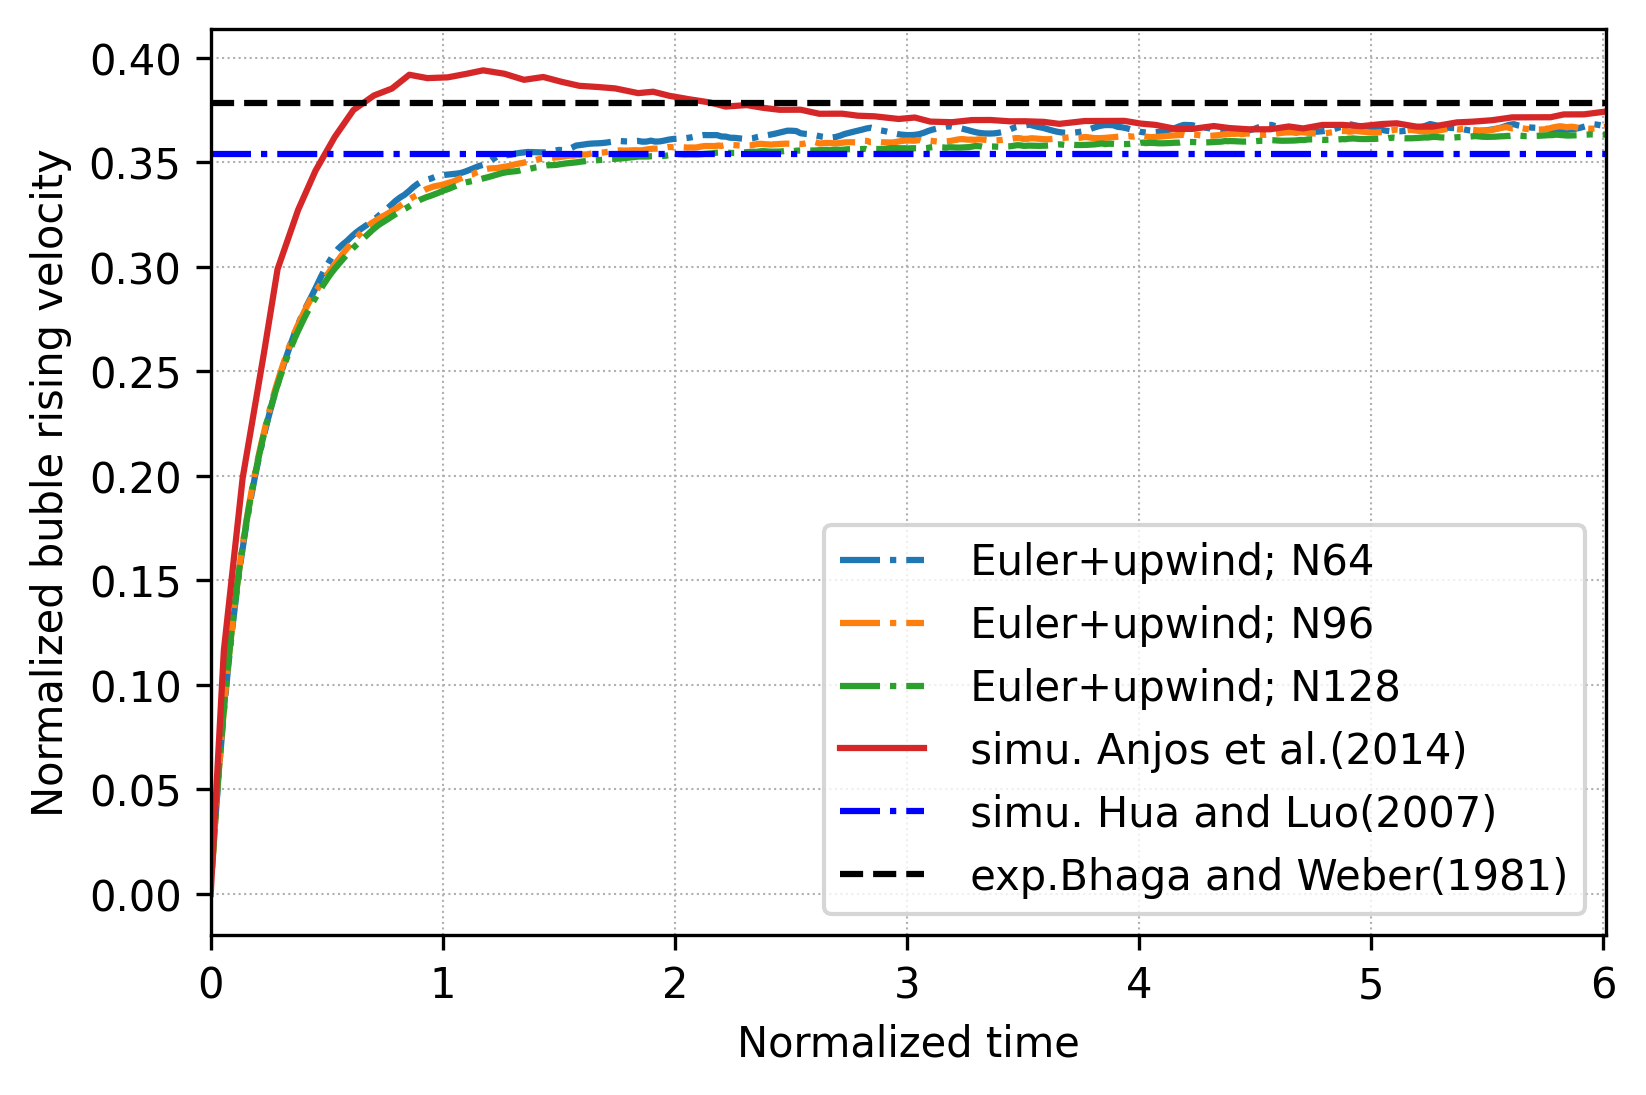

In [7]:
risingVelocity(dframe_isoAdv_risingU_Mo848,df_ref_anjos_Mo848,ref_HL_Mo848,ref_BW_Mo848)

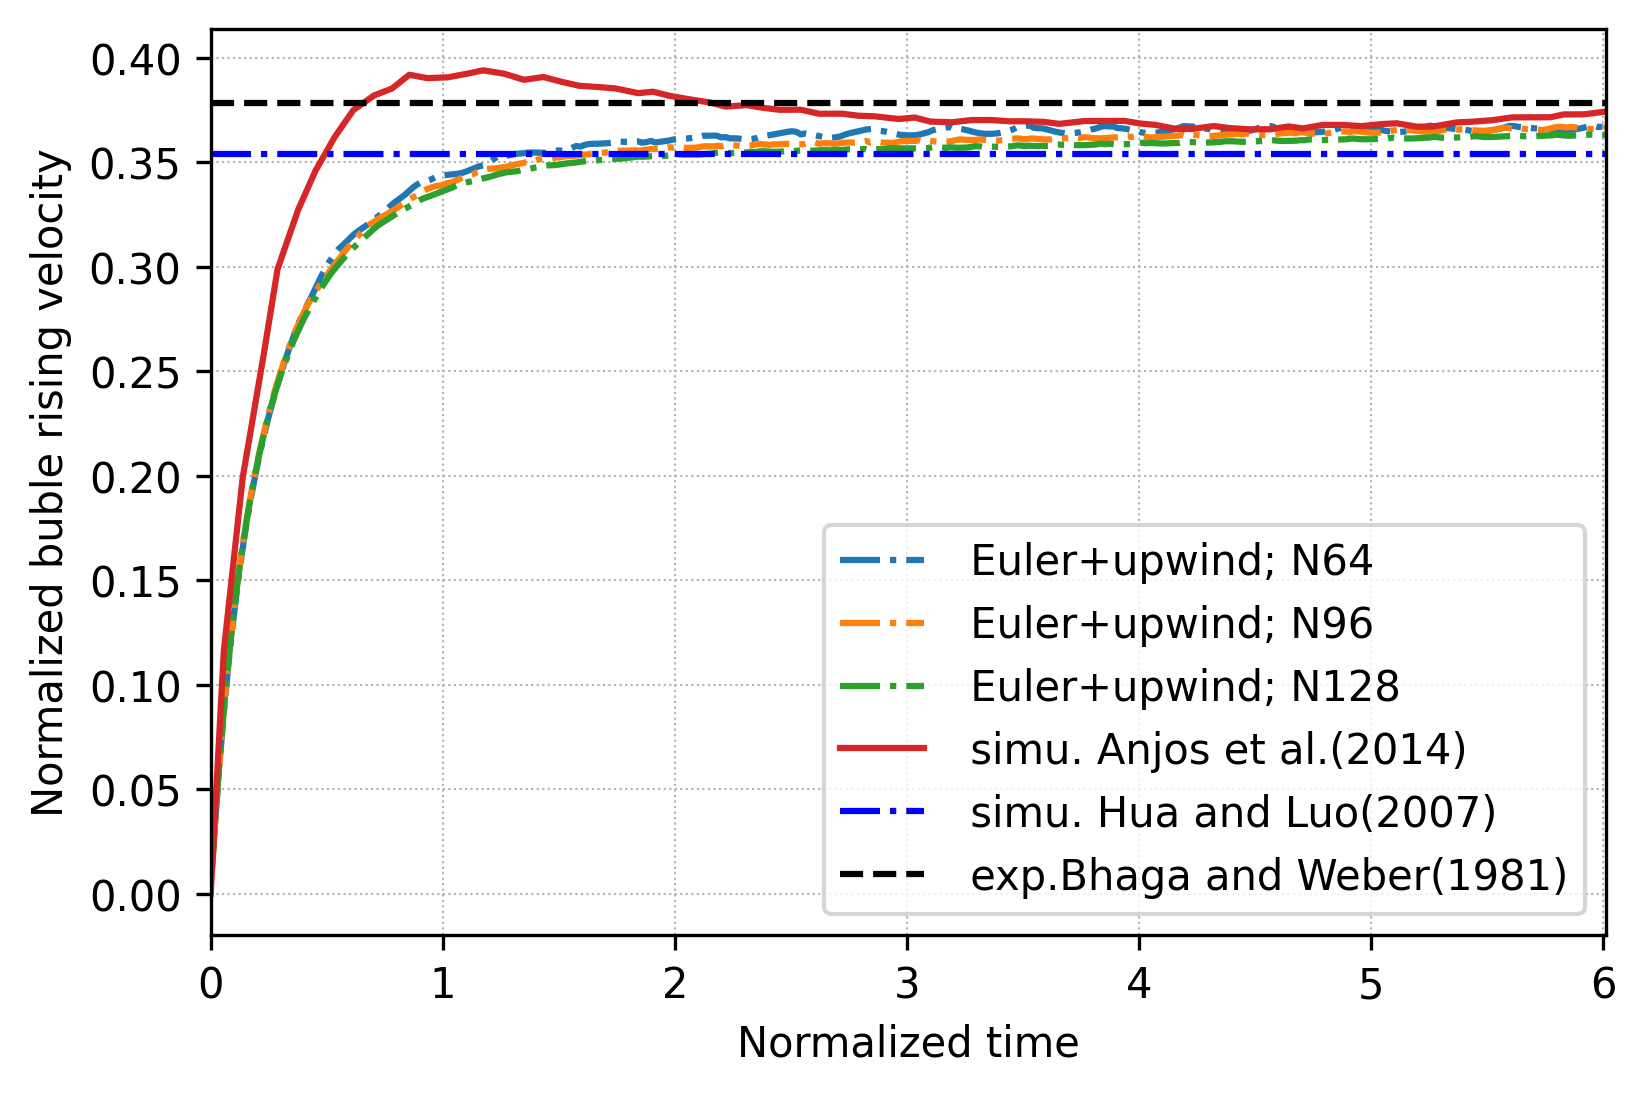

In [9]:
risingVelocity(dframe_isoRho_risingU_Mo848,df_ref_anjos_Mo848,ref_HL_Mo848,ref_BW_Mo848)

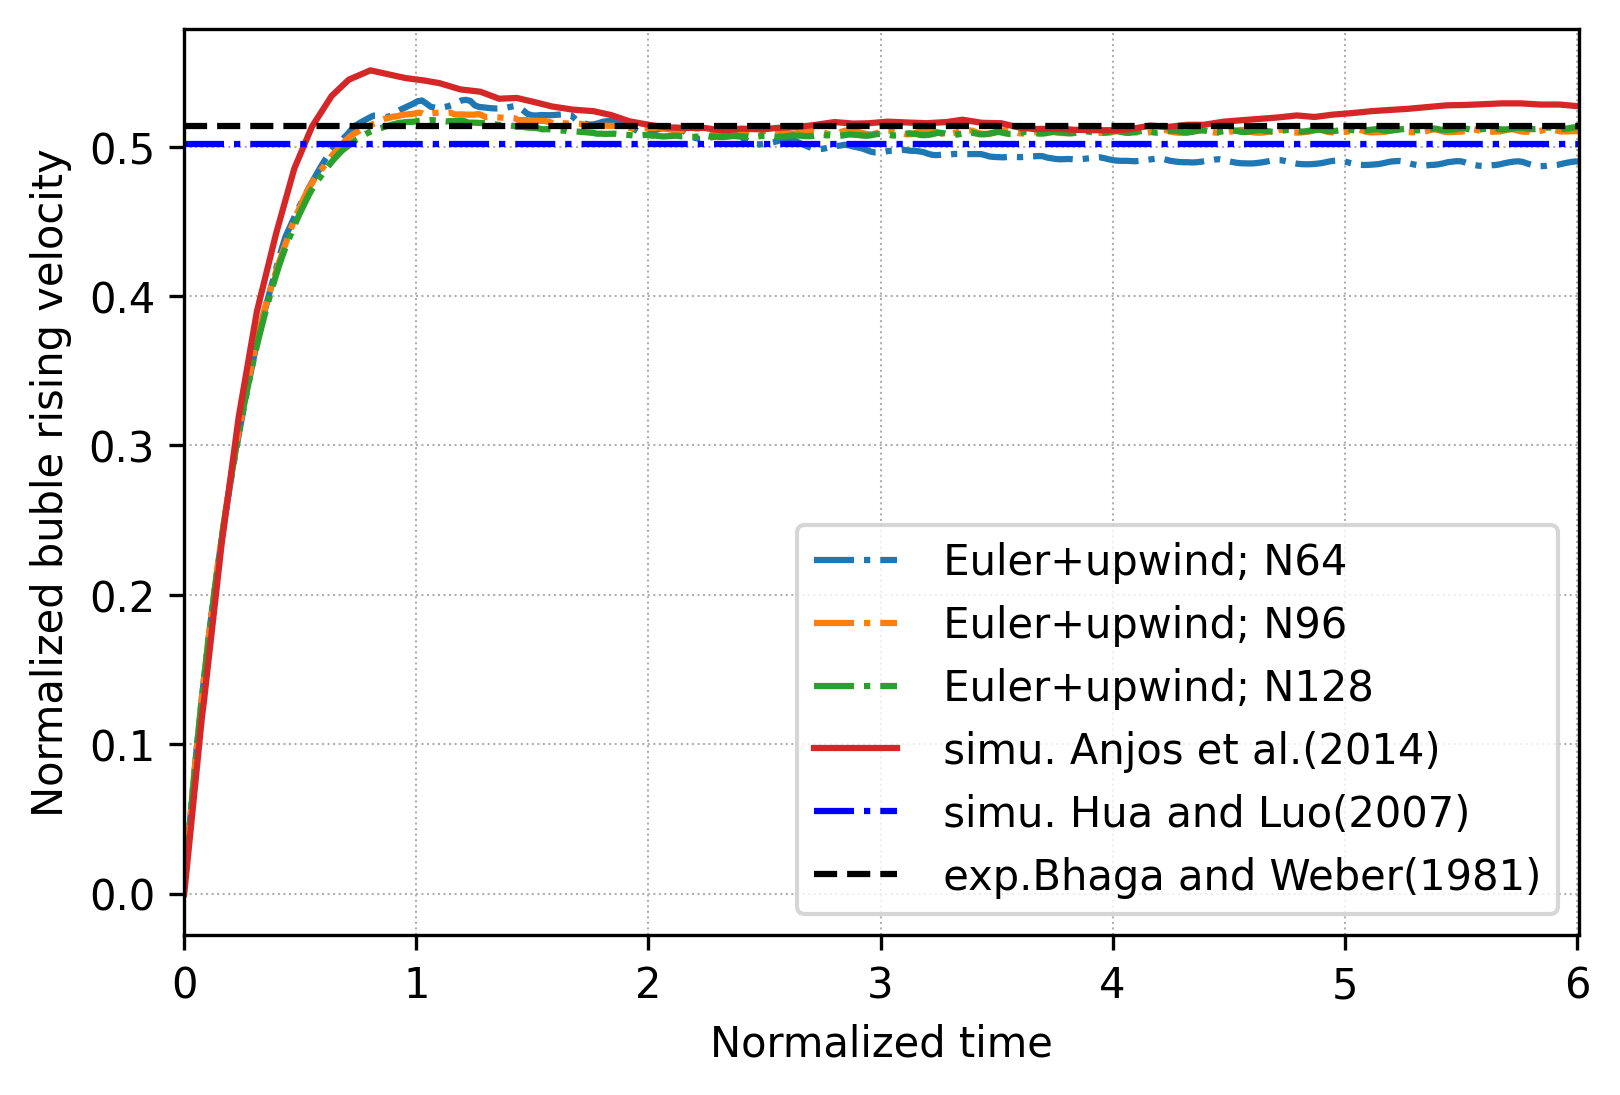

In [10]:
risingVelocity(dframe_isoAdv_risingU_Mo41d1,df_ref_anjos_Mo41d1,ref_HL_Mo41d1,ref_BW_Mo41d1)

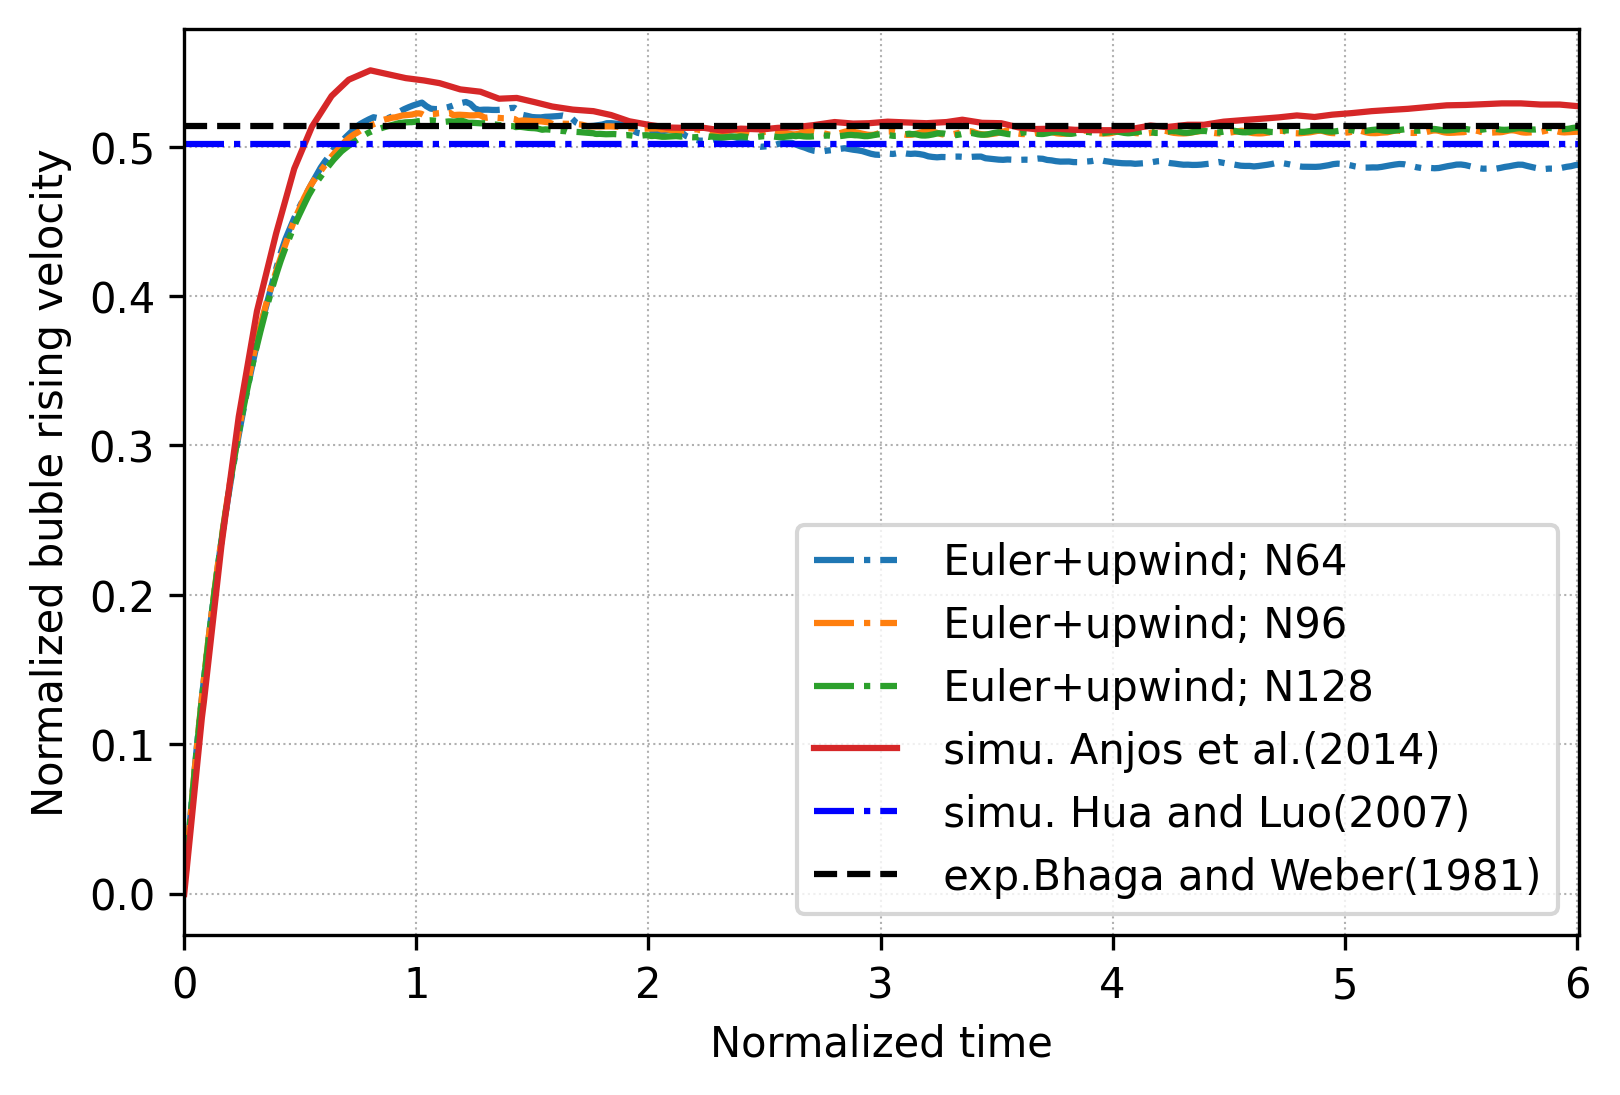

In [11]:
risingVelocity(dframe_isoRho_risingU_Mo41d1,df_ref_anjos_Mo41d1,ref_HL_Mo41d1,ref_BW_Mo41d1)